# Overview

In this report, I am going to use the VADER program to analyse the average positivity and negativity ratings of tweets that mention president Joe Biden over a 6 day period. I am conducting this analysis to see whether or not the sentiment analysis ratings of tweets have noticable enough changes to determine whether or not the president addressed a controversial topic that day. My hypothesis is that people on twitter are going to say the same amount of positive and negative things about Joe Biden no matter the statements he made that day.

In seperate notebooks, I have used twitter API to collect JSON data of tweets from May 4th through May 10th, requesting slightly under 10,000 tweets per day, while using a query to only select tweets containing "Biden" in their text file. Then I put each days data into dataframes that organise the data by columns, such as the user ID of the post, the date and time of the post, and the text that was in the post. Then I converted each day's dataframe into an individual .CSV file. This allows me to run each day's text file data through the VADER program and get the average rating for each day. 

Here I start the program by importing the tools I need such as pandas and the VADER sentiment analysis program. 

In [63]:
import requests
import urllib
import json
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings

Here I import the 6 .csv files I have created for each day of the analysis

In [64]:
Day_1 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_1.csv')
Day_2 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_2.csv')
Day_3 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_3.csv')
Day_4 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_4.csv')
Day_5 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_5.csv')
Day_6 = pd.read_csv(r'C:\Users\mason\Documents\Data EMAT\Day_6.csv')

In [65]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

Here I set up VADER so I can request the average positivity and negativity scores from each .csv file

In [66]:
Day_1['vader_scores'] = [analyser.polarity_scores(x) for x in Day_1['text']]
Day_2['vader_scores'] = [analyser.polarity_scores(x) for x in Day_2['text']]
Day_3['vader_scores'] = [analyser.polarity_scores(x) for x in Day_3['text']]
Day_4['vader_scores'] = [analyser.polarity_scores(x) for x in Day_4['text']]
Day_5['vader_scores'] = [analyser.polarity_scores(x) for x in Day_5['text']]
Day_6['vader_scores'] = [analyser.polarity_scores(x) for x in Day_6['text']]

In [67]:
Day_1['neg'] = [x['neg'] for x in Day_1['vader_scores']]
Day_2['neg'] = [x['neg'] for x in Day_2['vader_scores']]
Day_3['neg'] = [x['neg'] for x in Day_3['vader_scores']]
Day_4['neg'] = [x['neg'] for x in Day_4['vader_scores']]
Day_5['neg'] = [x['neg'] for x in Day_5['vader_scores']]
Day_6['neg'] = [x['neg'] for x in Day_6['vader_scores']]

In [68]:
Day_1['pos'] = [x['pos'] for x in Day_1['vader_scores']]
Day_2['pos'] = [x['pos'] for x in Day_2['vader_scores']]
Day_3['pos'] = [x['pos'] for x in Day_3['vader_scores']]
Day_4['pos'] = [x['pos'] for x in Day_4['vader_scores']]
Day_5['pos'] = [x['pos'] for x in Day_5['vader_scores']]
Day_6['pos'] = [x['pos'] for x in Day_6['vader_scores']]

Here I import the stats and pyplot tools so I can create bar graphs of the data

In [69]:
from scipy import stats

In [70]:
from matplotlib import pyplot as plt

Here I plot the average negative and positive analysis ratings for all 6 days on bar graphs

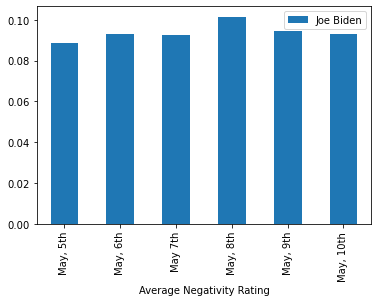

In [71]:
df = pd.DataFrame({'Average Negativity Rating': ['May, 5th', 'May, 6th', 'May 7th', 'May, 8th', 'May, 9th', 'May, 10th'], 'Joe Biden': [stats.describe(Day_1['neg']).mean, stats.describe(Day_2['neg']).mean, stats.describe(Day_3['neg']).mean, stats.describe(Day_4['neg']).mean, stats.describe(Day_5['neg']).mean, stats.describe(Day_6['neg']).mean]})
ax = df.plot.bar(x='Average Negativity Rating')

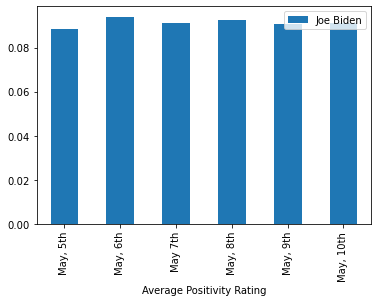

In [72]:
df = pd.DataFrame({'Average Positivity Rating': ['May, 5th', 'May, 6th', 'May 7th', 'May, 8th', 'May, 9th', 'May, 10th'], 'Joe Biden': [stats.describe(Day_1['pos']).mean, stats.describe(Day_2['pos']).mean, stats.describe(Day_3['pos']).mean, stats.describe(Day_4['pos']).mean, stats.describe(Day_5['pos']).mean, stats.describe(Day_6['pos']).mean]})
ax = df.plot.bar(x='Average Positivity Rating')

After looking at the two graphs, all 6 days seem to have a very similar negativity and positivity rating of around 0.9. On May 8th hovever you see a significant increase of 0.1 points. After looking at major headlines relating to the president during this 6 day period, May 8th stands out, which could be the reason for the negativity increase. While during the other days Joe Biden has mostly focused on issues such as vaccines for COVID-19 and the economy, but on May 8th Joe Biden addressed gun control. On May 8th, President Biden released what his administration is going to try to do to increase gun control, because congress has not been able to act on it yet. There isn't enough information to be sure, but the president's action's enforcing stonger gun control seem to be what caused the 0.1 point increase to the negativity rating, becuase gun control was not addressed by the president on any of the other days. 

# Conclusion

While sentiment analysis ratings generally do not fluctuate very much with large sections of twitter data, slight changes can be noticed depending on what topics the president addressed that day. My hypothesis was incorrect, while there was no noticable change in positivity ratings, negativity ratings did increase only on the one day President Biden said he was going to increase gun control. In conclusion, VADER sentiment analysis can be properly used with Twitter data to determine if a topic is controversial. 

# Reflection

There were a few major limitations I came across during this analysis. The biggest one I feel that held this analysis back was the fact that I could only request data that was from 7 days ago or sooner. A larger timeframe of data collection would have made this a much more interesting and useful analysis. If I could do this analysis again with the full version of Twitter API I would take a different approach and look for specific dates that had lots of controversy and dates that had very little controversy and compare them. I would also gather data from dates that had a higher approval rating of the President and lower aproval rating and compare those as well. That way the results would be a lot more clear and visually appealing. The next step for this analysis is to get access to the full version of Twitter API and collect data from a much larger timeframe.